## PROSES EDA DAN PRE PROCESSING DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# 1. Baca data
df = pd.read_excel("C:/Users/acer/obesity_data (1).xlsx")

In [4]:
# 2. Lihat 5 baris pertama
print(df.head())

   Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56    Male  173.575262  71.982051  23.891783                      4   
1   69    Male  164.127306  89.959256  33.395209                      2   
2   46  Female  168.072202  72.930629  25.817737                      4   
3   32    Male  168.459633  84.886912  29.912247                      3   
4   60    Male  183.568568  69.038945  20.487903                      3   

  ObesityCategory  
0   Normal weight  
1           Obese  
2      Overweight  
3      Overweight  
4   Normal weight  


#### INTERPRETASI

Output tersebut merupakan isi dari dataset dengan mengambil 5 data pertama.


In [5]:
# 3. Informasi umum
print("\nInfo DataFrame:")
print(df.info())


Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB
None


#### INTERPRETASI

Dataset ini terdiri dari 1.000 entri dan 7 kolom yang merepresentasikan berbagai informasi terkait karakteristik individu, seperti usia, jenis kelamin, tinggi badan, berat badan, indeks massa tubuh (BMI), tingkat aktivitas fisik, dan kategori obesitas. Setiap baris merepresentasikan satu individu, sehingga dataset ini cukup besar dan representatif untuk dilakukan analisis lebih lanjut.

Seluruh kolom dalam dataset ini tidak mengandung nilai kosong (missing value), yang berarti data telah lengkap dan tidak memerlukan proses pembersihan awal seperti imputasi. Hal ini memudahkan dalam tahap analisis karena tidak ada kendala data yang hilang.

Tipe data pada masing-masing kolom juga sudah sesuai. Kolom Age dan PhysicalActivityLevel bertipe integer, sedangkan Height, Weight, dan BMI bertipe float karena melibatkan angka desimal. Sementara itu, kolom Gender dan ObesityCategory bertipe objek (kategori), yang cocok digunakan untuk analisis kategorikal seperti segmentasi atau klasifikasi.

In [6]:
# 4. Cek nilai kosong
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64


#### INTERPRETASI

Berdasarkan hasil pengecekan missing values, diketahui bahwa seluruh kolom dalam dataset ini tidak memiliki nilai yang hilang (missing values). Setiap kolom mulai dari Age, Gender, Height, Weight, BMI, PhysicalActivityLevel, hingga ObesityCategory, memiliki jumlah data yang lengkap sebanyak 1.000 entri.

In [7]:
# 5. Statistik deskriptif
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               Age       Height       Weight          BMI  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     49.857000   170.052417    71.205769    24.888317   
std      18.114267    10.309971    15.509849     6.193912   
min      18.000000   136.115719    26.065730     8.470572   
25%      35.000000   163.514205    61.129629    20.918068   
50%      50.000000   169.801665    71.929072    24.698647   
75%      66.000000   177.353596    81.133746    28.732132   
max      79.000000   201.419670   118.907366    50.791898   

       PhysicalActivityLevel  
count            1000.000000  
mean                2.534000  
std                 1.116284  
min                 1.000000  
25%                 2.000000  
50%                 3.000000  
75%                 4.000000  
max                 4.000000  


#### INTERPRETASI

Berdasarkan hasil statistik deskriptif dari dataset, diperoleh gambaran umum mengenai sebaran dan karakteristik data yang dianalisis. Rata-rata usia responden adalah sekitar 49,86 tahun, dengan usia termuda 18 tahun dan tertua 79 tahun. Ini menunjukkan bahwa data mencakup kelompok usia dewasa muda hingga lansia. Penyebaran usia cukup lebar, ditunjukkan oleh standar deviasi sebesar 18,11 tahun.

Untuk tinggi badan, rata-rata berada di kisaran 170 cm dengan nilai minimum sekitar 136 cm dan maksimum lebih dari 201 cm. Sementara berat badan rata-rata adalah sekitar 71,2 kg, dengan sebaran yang juga cukup besar (standar deviasi 15,5 kg), menunjukkan variasi massa tubuh yang cukup beragam dalam populasi ini. Hal ini tercermin pula dalam nilai BMI, yang memiliki rata-rata 24,89 dan rentang dari 8,47 hingga 50,79, menunjukkan keberadaan individu dengan status gizi mulai dari sangat kurus hingga obesitas ekstrem.

Tingkat aktivitas fisik secara umum berada pada level sedang, dengan rata-rata 2,53 dari skala 1 hingga 4. Kuartil menunjukkan bahwa sebagian besar individu berada pada level aktivitas antara 2 hingga 4, dengan tidak ada individu yang melampaui level maksimum (4).

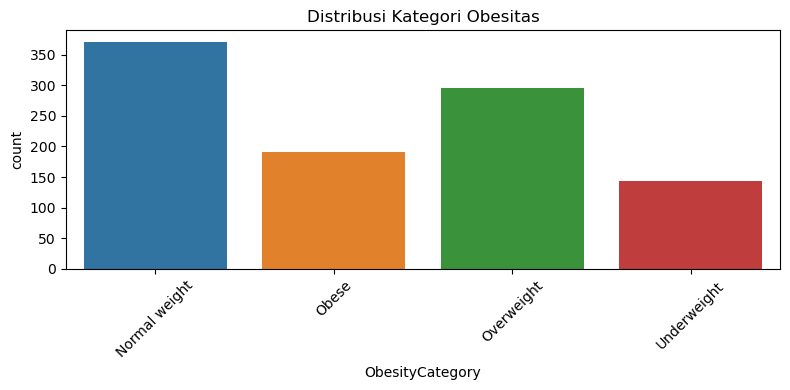

In [9]:
# 6. Distribusi target (Obesity)
plt.figure(figsize=(8, 4))
sns.countplot(x='ObesityCategory', data=df)
plt.title('Distribusi Kategori Obesitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### INTERPRETASI

Berdasarkan grafik batang yang menampilkan distribusi kategori obesitas, dapat diinterpretasikan bahwa:
Mayoritas individu dalam dataset termasuk dalam kategori Normal weight (berat badan normal), dengan jumlah tertinggi di antara kategori lainnya, yaitu lebih dari 350 orang. Ini menunjukkan bahwa sebagian besar populasi memiliki BMI dalam rentang sehat.

Kategori Overweight (kelebihan berat badan) menempati posisi kedua terbanyak, diikuti oleh kategori Obese (obesitas). Hal ini mengindikasikan bahwa jumlah individu dengan kelebihan berat badan dan obesitas juga cukup signifikan, yang dapat menjadi perhatian dalam konteks kesehatan masyarakat.

Sementara itu, kategori Underweight (berat badan kurang) merupakan yang paling sedikit jumlahnya, meskipun masih cukup signifikan dengan lebih dari 100 orang. Ini menunjukkan bahwa isu berat badan rendah juga perlu diperhatikan meskipun tidak sebesar masalah kelebihan berat badan.

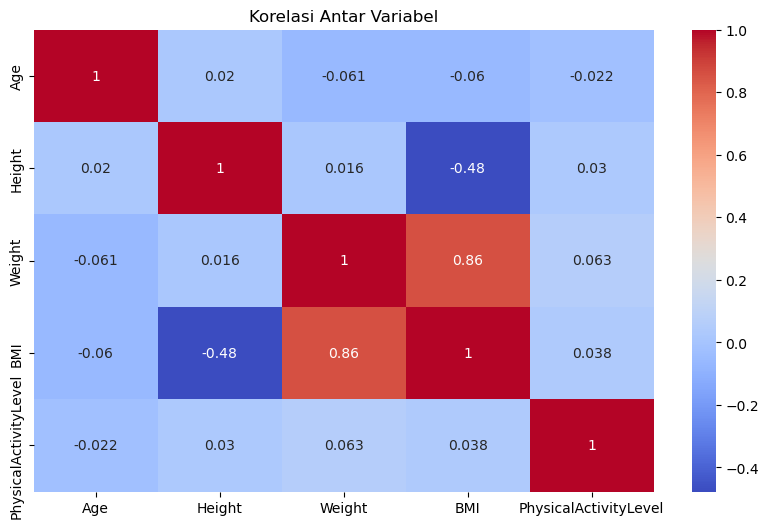

In [10]:
# 7. Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

#### INTERPRETASI

In [14]:
# 8. Encode kolom kategorikal
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0
le_obesity = LabelEncoder()
df['Obesity'] = le_obesity.fit_transform(df['ObesityCategory'])  # Target numerik

print(df[['Gender', 'ObesityCategory']].head())
print(df['Gender'].unique())
print(df['Obesity'].unique())

   Gender ObesityCategory
0       1   Normal weight
1       1           Obese
2       0      Overweight
3       1      Overweight
4       1   Normal weight
[1 0]
[0 1 2 3]


#### INTERPRETASI

Berdasarkan kode yang diberikan, kolom Gender dan ObesityCategory telah diubah menjadi nilai numerik menggunakan metode LabelEncoder(). Pada kolom Gender, label "Male" diubah menjadi 1, sementara "Female" diubah menjadi 0. Sehingga, nilai 1 menunjukkan jenis kelamin Male, dan nilai 0 menunjukkan Female. Pada kolom ObesityCategory, label kategorikal juga diubah menjadi nilai numerik. Nilai 0 mungkin merujuk pada kategori Normal weight, 1 untuk Obese, 2 untuk Overweight, dan 3 bisa mewakili kategori lain yang terkait dengan status obesitas, misalnya Underweight atau kategori lainnya, tergantung pada dataset yang digunakan. Output yang dihasilkan menunjukkan bahwa kolom Gender hanya memiliki dua nilai unik, yaitu Male (1) dan Female (0), sementara kolom ObesityCategory memiliki empat nilai unik yang menggambarkan berbagai status obesitas, yaitu Normal weight (0), Obese (1), Overweight (2), dan kategori lainnya (3). Hal ini menunjukkan bahwa kedua kolom telah berhasil diubah menjadi format numerik yang siap digunakan untuk analisis lebih lanjut atau pemodelan.

In [15]:
# Simpan mapping label 
print("\nMapping Gender:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))
print("Mapping Obesity:", dict(zip(le_obesity.classes_, le_obesity.transform(le_obesity.classes_))))


Mapping Gender: {0: 0, 1: 1}
Mapping Obesity: {'Normal weight': 0, 'Obese': 1, 'Overweight': 2, 'Underweight': 3}


#### INTERPRETASI

Mapping yang diberikan mengonversi kategori teks dalam kolom Gender dan ObesityCategory menjadi nilai numerik. Pada kolom Gender, Female diubah menjadi 0 dan Male menjadi 1. Sementara itu, pada kolom ObesityCategory, kategori Normal weight diubah menjadi 0, Obese menjadi 1, Overweight menjadi 2, dan Underweight menjadi 3.

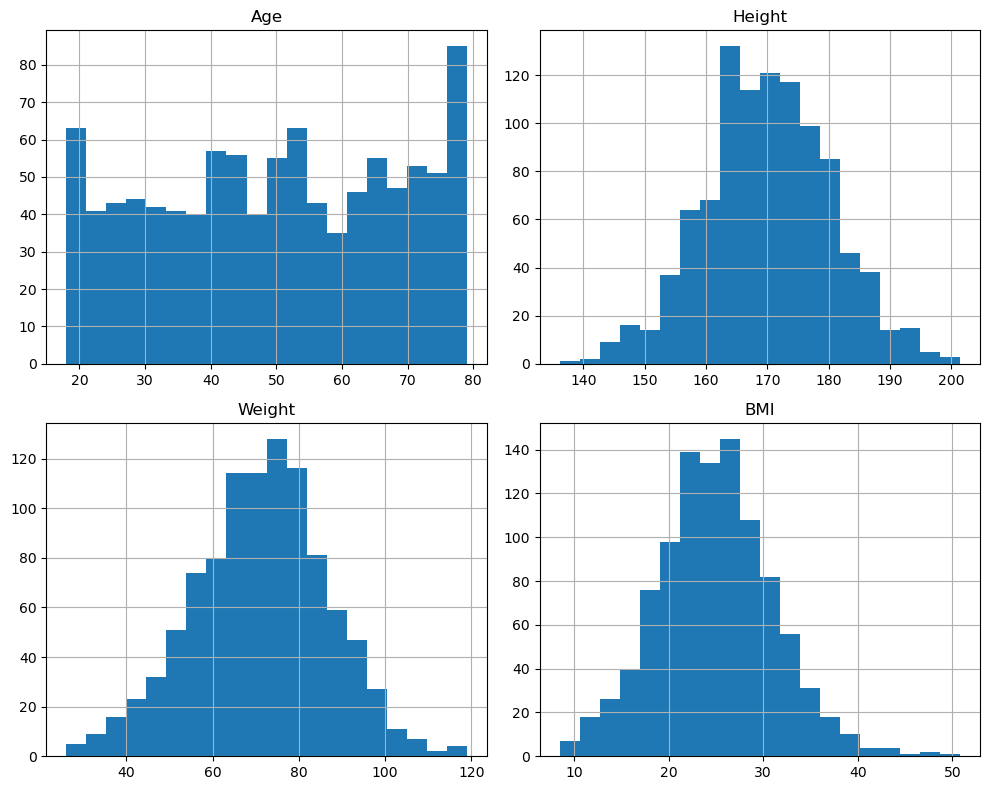

In [16]:
# 9. Cek distribusi fitur numerik
df.hist(['Age', 'Height', 'Weight', 'BMI'], figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

#### INTERPRETASI

In [17]:
# 10. Scaling fitur numerik
scaler = StandardScaler()
numerik_fitur = ['Age', 'Height', 'Weight', 'BMI']
df[numerik_fitur] = scaler.fit_transform(df[numerik_fitur])

#### INTERPRETASI

Kode yang diberikan melakukan scaling pada fitur numerik 'Age', 'Height', 'Weight', dan 'BMI' menggunakan StandardScaler(), yang mengubah nilai-nilai dalam fitur tersebut agar memiliki rata-rata 0 dan deviasi standar 1. 

In [18]:
# 11. Simpan data siap pakai
df.to_csv('processed_obesity.csv', index=False)
print("\nData selesai diproses dan disimpan sebagai 'processed_obesity.csv'")


Data selesai diproses dan disimpan sebagai 'processed_obesity.csv'


#### INTERPRETASI

Setelah melakukan proses pemrosesan data, seperti encoding untuk kolom Gender dan ObesityCategory, serta scaling untuk fitur numerik seperti Age, Height, Weight, dan BMI, data yang telah diproses tersebut disimpan dengan nama 'processed_obesity.csv'.